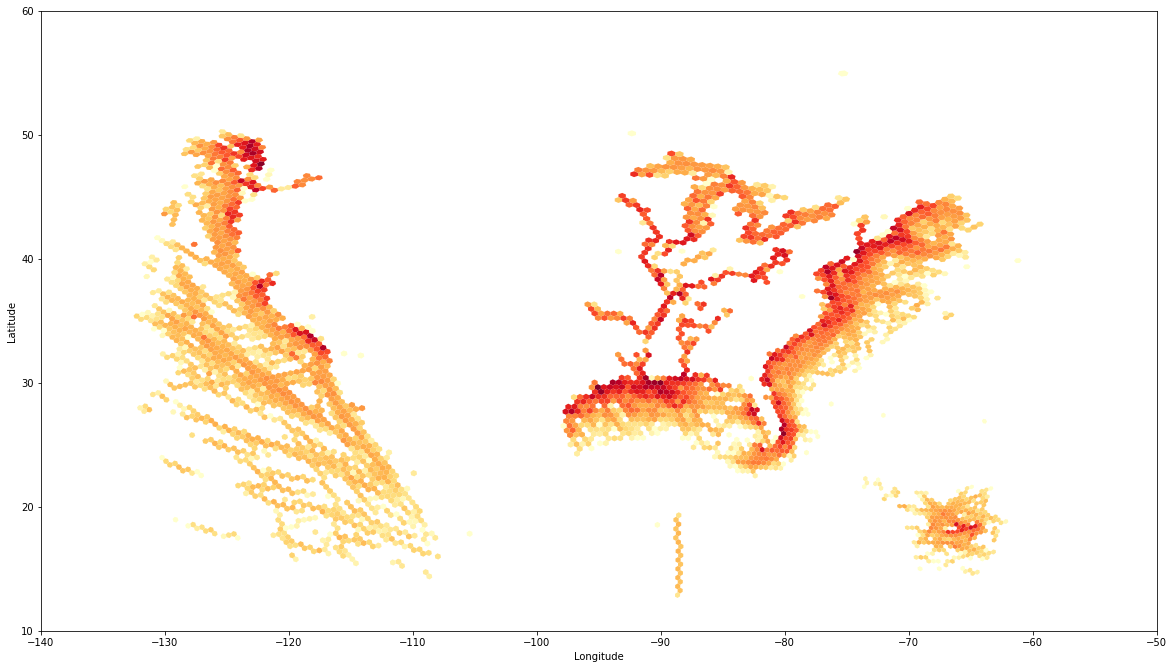

In [0]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import h3
import h3_pyspark
from pyspark.sql import functions as F
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import matplotlib.colors as colors

# Define the lat/lon boundaries
min_lat, max_lat, min_lon, max_lon = 10, 60, -140, -50

# Define the hexagon resolution
resolution = 4

# Define the day of the month (change this value according to your requirement)
day_of_month = 1

# Read the spark dataframe
df_ais_june = spark.read.table("ais.june")

# Filter the dataframe for the specific day of the month
df_ais_june = df_ais_june.filter(F.dayofmonth('BaseDateTime') == day_of_month)

# Add a 'resolution' column
df_ais_june = df_ais_june.withColumn('resolution', F.lit(resolution))

# Create an h3 index for each location using the UDF
df_ais_june = df_ais_june.withColumn('hex_id', h3_pyspark.geo_to_h3(df_ais_june['LAT'], df_ais_june['LON'], df_ais_june['resolution']))

# Count the occurrences of each hex_id to get the density
df_density = df_ais_june.groupBy('hex_id').count()

# Convert the density dataframe to Pandas
df_density_pd = df_density.toPandas()

# Create polygons for each unique hex_id, and filter them based on the bounding box
hex_polygons = []
hex_ids = []
for hex_id in df_density_pd['hex_id'].unique():
    hex_boundary = h3.h3_to_geo_boundary(hex_id)
    polygon = Polygon([(lon, lat) for lat, lon in hex_boundary])
    # create a point based on the polygon's centroid and check if it lies within the bounding box
    centroid = polygon.centroid
    if min_lat <= centroid.y <= max_lat and min_lon <= centroid.x <= max_lon:
        hex_polygons.append(polygon)
        hex_ids.append(hex_id)

# Filter the density dataframe to only include hexagons within the bounding box
df_density_pd = df_density_pd[df_density_pd['hex_id'].isin(hex_ids)]

# Replace inf with max non-inf value and NaN with 1
df_density_pd.loc[df_density_pd['count'] == np.inf, 'count'] = df_density_pd.loc[df_density_pd['count'] != np.inf, 'count'].max()
df_density_pd['count'] = df_density_pd['count'].replace({0:1}).fillna(1)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_density_pd, geometry=hex_polygons)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
gdf.plot(column='count', cmap='YlOrRd', norm=colors.LogNorm(vmin=gdf['count'].min(), vmax=gdf['count'].max()), missing_kwds={'color': 'white'}, ax=ax)
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

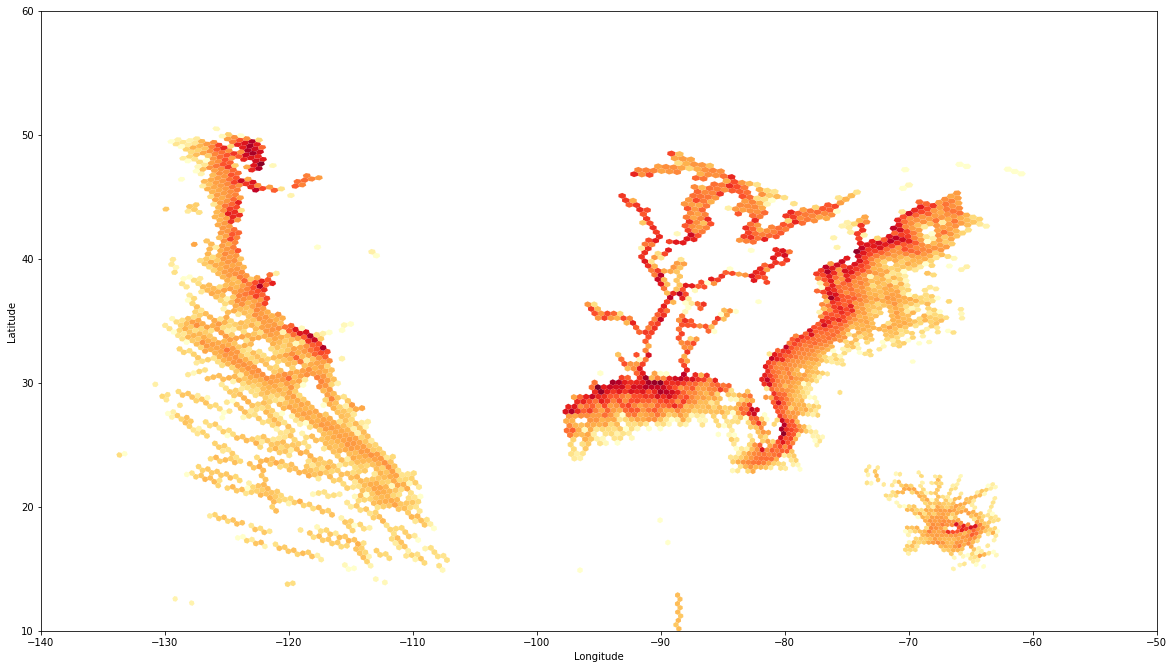

In [0]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import h3
import h3_pyspark
from pyspark.sql import functions as F
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import matplotlib.colors as colors

# Define the lat/lon boundaries
min_lat, max_lat, min_lon, max_lon = 10, 60, -140, -50

# Define the hexagon resolution
resolution = 4

# Define the day of the month (change this value according to your requirement)
day_of_month = 2

# Read the spark dataframe
df_ais_june = spark.read.table("ais.june")

# Filter the dataframe for the specific day of the month
df_ais_june = df_ais_june.filter(F.dayofmonth('BaseDateTime') == day_of_month)

# Add a 'resolution' column
df_ais_june = df_ais_june.withColumn('resolution', F.lit(resolution))

# Create an h3 index for each location using the UDF
df_ais_june = df_ais_june.withColumn('hex_id', h3_pyspark.geo_to_h3(df_ais_june['LAT'], df_ais_june['LON'], df_ais_june['resolution']))

# Count the occurrences of each hex_id to get the density
df_density = df_ais_june.groupBy('hex_id').count()

# Convert the density dataframe to Pandas
df_density_pd = df_density.toPandas()

# Create polygons for each unique hex_id, and filter them based on the bounding box
hex_polygons = []
hex_ids = []
for hex_id in df_density_pd['hex_id'].unique():
    hex_boundary = h3.h3_to_geo_boundary(hex_id)
    polygon = Polygon([(lon, lat) for lat, lon in hex_boundary])
    # create a point based on the polygon's centroid and check if it lies within the bounding box
    centroid = polygon.centroid
    if min_lat <= centroid.y <= max_lat and min_lon <= centroid.x <= max_lon:
        hex_polygons.append(polygon)
        hex_ids.append(hex_id)

# Filter the density dataframe to only include hexagons within the bounding box
df_density_pd = df_density_pd[df_density_pd['hex_id'].isin(hex_ids)]

# Replace inf with max non-inf value and NaN with 1
df_density_pd.loc[df_density_pd['count'] == np.inf, 'count'] = df_density_pd.loc[df_density_pd['count'] != np.inf, 'count'].max()
df_density_pd['count'] = df_density_pd['count'].replace({0:1}).fillna(1)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_density_pd, geometry=hex_polygons)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
gdf.plot(column='count', cmap='YlOrRd', norm=colors.LogNorm(vmin=gdf['count'].min(), vmax=gdf['count'].max()), missing_kwds={'color': 'white'}, ax=ax)
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


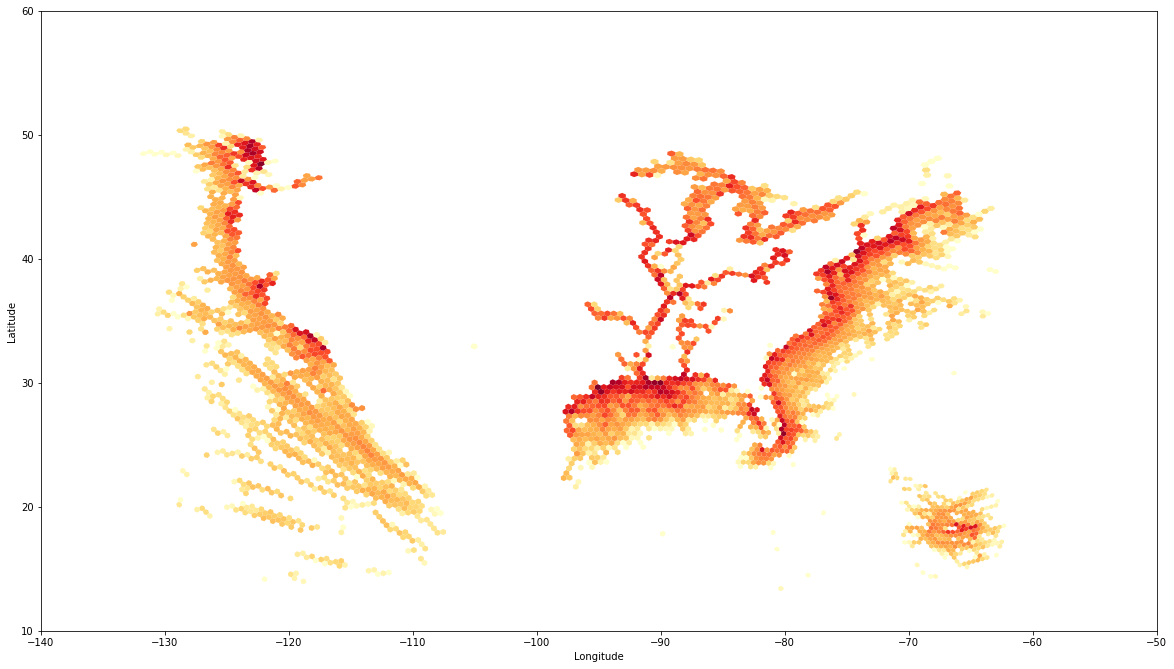

In [0]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import h3
import h3_pyspark
from pyspark.sql import functions as F
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import matplotlib.colors as colors

# Define the lat/lon boundaries
min_lat, max_lat, min_lon, max_lon = 10, 60, -140, -50

# Define the hexagon resolution
resolution = 4

# Define the day of the month (change this value according to your requirement)
day_of_month = 3

# Read the spark dataframe
df_ais_june = spark.read.table("ais.june")

# Filter the dataframe for the specific day of the month
df_ais_june = df_ais_june.filter(F.dayofmonth('BaseDateTime') == day_of_month)

# Add a 'resolution' column
df_ais_june = df_ais_june.withColumn('resolution', F.lit(resolution))

# Create an h3 index for each location using the UDF
df_ais_june = df_ais_june.withColumn('hex_id', h3_pyspark.geo_to_h3(df_ais_june['LAT'], df_ais_june['LON'], df_ais_june['resolution']))

# Count the occurrences of each hex_id to get the density
df_density = df_ais_june.groupBy('hex_id').count()

# Convert the density dataframe to Pandas
df_density_pd = df_density.toPandas()

# Create polygons for each unique hex_id, and filter them based on the bounding box
hex_polygons = []
hex_ids = []
for hex_id in df_density_pd['hex_id'].unique():
    hex_boundary = h3.h3_to_geo_boundary(hex_id)
    polygon = Polygon([(lon, lat) for lat, lon in hex_boundary])
    # create a point based on the polygon's centroid and check if it lies within the bounding box
    centroid = polygon.centroid
    if min_lat <= centroid.y <= max_lat and min_lon <= centroid.x <= max_lon:
        hex_polygons.append(polygon)
        hex_ids.append(hex_id)

# Filter the density dataframe to only include hexagons within the bounding box
df_density_pd = df_density_pd[df_density_pd['hex_id'].isin(hex_ids)]

# Replace inf with max non-inf value and NaN with 1
df_density_pd.loc[df_density_pd['count'] == np.inf, 'count'] = df_density_pd.loc[df_density_pd['count'] != np.inf, 'count'].max()
df_density_pd['count'] = df_density_pd['count'].replace({0:1}).fillna(1)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_density_pd, geometry=hex_polygons)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
gdf.plot(column='count', cmap='YlOrRd', norm=colors.LogNorm(vmin=gdf['count'].min(), vmax=gdf['count'].max()), missing_kwds={'color': 'white'}, ax=ax)
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


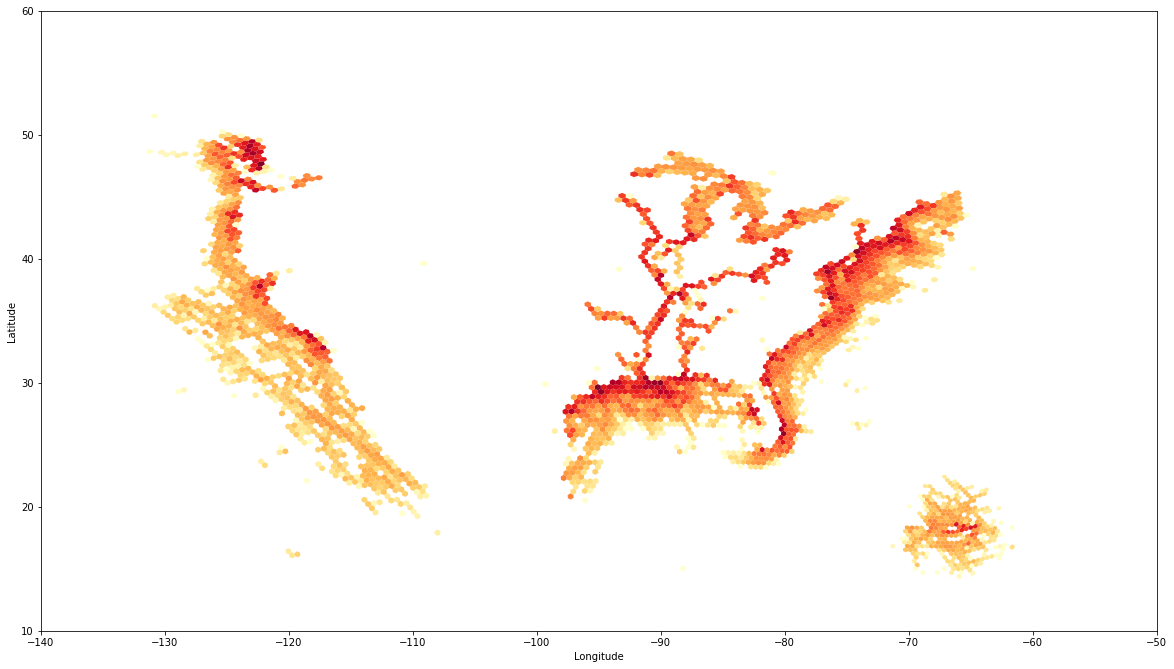

In [0]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import h3
import h3_pyspark
from pyspark.sql import functions as F
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import matplotlib.colors as colors

# Define the lat/lon boundaries
min_lat, max_lat, min_lon, max_lon = 10, 60, -140, -50

# Define the hexagon resolution
resolution = 4

# Define the day of the month (change this value according to your requirement)
day_of_month = 4

# Read the spark dataframe
df_ais_june = spark.read.table("ais.june")

# Filter the dataframe for the specific day of the month
df_ais_june = df_ais_june.filter(F.dayofmonth('BaseDateTime') == day_of_month)

# Add a 'resolution' column
df_ais_june = df_ais_june.withColumn('resolution', F.lit(resolution))

# Create an h3 index for each location using the UDF
df_ais_june = df_ais_june.withColumn('hex_id', h3_pyspark.geo_to_h3(df_ais_june['LAT'], df_ais_june['LON'], df_ais_june['resolution']))

# Count the occurrences of each hex_id to get the density
df_density = df_ais_june.groupBy('hex_id').count()

# Convert the density dataframe to Pandas
df_density_pd = df_density.toPandas()

# Create polygons for each unique hex_id, and filter them based on the bounding box
hex_polygons = []
hex_ids = []
for hex_id in df_density_pd['hex_id'].unique():
    hex_boundary = h3.h3_to_geo_boundary(hex_id)
    polygon = Polygon([(lon, lat) for lat, lon in hex_boundary])
    # create a point based on the polygon's centroid and check if it lies within the bounding box
    centroid = polygon.centroid
    if min_lat <= centroid.y <= max_lat and min_lon <= centroid.x <= max_lon:
        hex_polygons.append(polygon)
        hex_ids.append(hex_id)

# Filter the density dataframe to only include hexagons within the bounding box
df_density_pd = df_density_pd[df_density_pd['hex_id'].isin(hex_ids)]

# Replace inf with max non-inf value and NaN with 1
df_density_pd.loc[df_density_pd['count'] == np.inf, 'count'] = df_density_pd.loc[df_density_pd['count'] != np.inf, 'count'].max()
df_density_pd['count'] = df_density_pd['count'].replace({0:1}).fillna(1)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_density_pd, geometry=hex_polygons)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
gdf.plot(column='count', cmap='YlOrRd', norm=colors.LogNorm(vmin=gdf['count'].min(), vmax=gdf['count'].max()), missing_kwds={'color': 'white'}, ax=ax)
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [0]:
import os

temp_dir = "/dbfs/tmp/ais_june_choropleth"
output_zip_file = "/dbfs/tmp/ais_june_choropleth.zip"

# Remove the output zip file
if os.path.exists(output_zip_file):
    os.remove(output_zip_file)

# Remove the temporary directory and its contents
if os.path.exists(temp_dir):
    for file_name in os.listdir(temp_dir):
        file_path = os.path.join(temp_dir, file_name)
        os.remove(file_path)
    os.rmdir(temp_dir)

print("Files deleted successfully.")

Files deleted successfully.


In [0]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import h3
import h3_pyspark
from pyspark.sql import functions as F
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import matplotlib.colors as colors

# Define the lat/lon boundaries
min_lat, max_lat, min_lon, max_lon = 10, 60, -140, -50

# Define the hexagon resolution
resolution = 4

# Iterate over the days of the month
for day_of_month in range(1, 31):
    # Read the spark dataframe
    df_ais_june = spark.read.table("ais.june")

    # Filter the dataframe for the specific day of the month
    df_ais_june = df_ais_june.filter(F.dayofmonth('BaseDateTime') == day_of_month)

    # Add a 'resolution' column
    df_ais_june = df_ais_june.withColumn('resolution', F.lit(resolution))

    # Create an h3 index for each location using the UDF
    df_ais_june = df_ais_june.withColumn('hex_id', h3_pyspark.geo_to_h3(df_ais_june['LAT'], df_ais_june['LON'], df_ais_june['resolution']))

    # Count the occurrences of each hex_id to get the density
    df_density = df_ais_june.groupBy('hex_id').count()

    # Convert the density dataframe to Pandas
    df_density_pd = df_density.toPandas()

    # Create polygons for each unique hex_id, and filter them based on the bounding box
    hex_polygons = []
    hex_ids = []
    for hex_id in df_density_pd['hex_id'].unique():
        hex_boundary = h3.h3_to_geo_boundary(hex_id)
        polygon = Polygon([(lon, lat) for lat, lon in hex_boundary])
        # create a point based on the polygon's centroid and check if it lies within the bounding box
        centroid = polygon.centroid
        if min_lat <= centroid.y <= max_lat and min_lon <= centroid.x <= max_lon:
            hex_polygons.append(polygon)
            hex_ids.append(hex_id)

    # Filter the density dataframe to only include hexagons within the bounding box
    df_density_pd = df_density_pd[df_density_pd['hex_id'].isin(hex_ids)]

    # Replace inf with max non-inf value and NaN with 1
    df_density_pd.loc[df_density_pd['count'] == np.inf, 'count'] = df_density_pd.loc[df_density_pd['count'] != np.inf, 'count'].max()
    df_density_pd['count'] = df_density_pd['count'].replace({0:1}).fillna(1)

    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame(df_density_pd, geometry=hex_polygons)

    # Save the choropleth map to a file
    output_file = f"/dbfs/tmp/ais_june_choropleth_{day_of_month}.png"
    fig, ax = plt.subplots(1, 1, figsize=(20, 20))
    gdf.plot(column='count', cmap='YlOrRd', norm=colors.LogNorm(vmin=gdf['count'].min(), vmax=gdf['count'].max()), missing_kwds={'color': 'white'}, ax=ax)
    plt.xlim(min_lon, max_lon)
    plt.ylim(min_lat, max_lat)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig(output_file)
    plt.close(fig)

    print(f"Choropleth map for day {day_of_month} saved to: {output_file}")

Choropleth map for day 1 saved to: /dbfs/tmp/ais_june_choropleth_1.png
Choropleth map for day 2 saved to: /dbfs/tmp/ais_june_choropleth_2.png
Choropleth map for day 3 saved to: /dbfs/tmp/ais_june_choropleth_3.png
Choropleth map for day 4 saved to: /dbfs/tmp/ais_june_choropleth_4.png
Choropleth map for day 5 saved to: /dbfs/tmp/ais_june_choropleth_5.png
Choropleth map for day 6 saved to: /dbfs/tmp/ais_june_choropleth_6.png
Choropleth map for day 7 saved to: /dbfs/tmp/ais_june_choropleth_7.png
Choropleth map for day 8 saved to: /dbfs/tmp/ais_june_choropleth_8.png
Choropleth map for day 9 saved to: /dbfs/tmp/ais_june_choropleth_9.png
Choropleth map for day 10 saved to: /dbfs/tmp/ais_june_choropleth_10.png
Choropleth map for day 11 saved to: /dbfs/tmp/ais_june_choropleth_11.png
Choropleth map for day 12 saved to: /dbfs/tmp/ais_june_choropleth_12.png
Choropleth map for day 13 saved to: /dbfs/tmp/ais_june_choropleth_13.png
Choropleth map for day 14 saved to: /dbfs/tmp/ais_june_choropleth_14.

In [0]:
dbutils.fs.rm("dbfs:/tmp/ais_june_choropleth.zip/", recurse=True)

Out[48]: True

In [0]:
%sh
ls /dbfs/tmp

ais_june_choropleth_1.png
ais_june_choropleth_10.png
ais_june_choropleth_11.png
ais_june_choropleth_12.png
ais_june_choropleth_13.png
ais_june_choropleth_14.png
ais_june_choropleth_15.png
ais_june_choropleth_16.png
ais_june_choropleth_17.png
ais_june_choropleth_18.png
ais_june_choropleth_19.png
ais_june_choropleth_2.png
ais_june_choropleth_20.png
ais_june_choropleth_21.png
ais_june_choropleth_22.png
ais_june_choropleth_23.png
ais_june_choropleth_24.png
ais_june_choropleth_25.png
ais_june_choropleth_26.png
ais_june_choropleth_27.png
ais_june_choropleth_28.png
ais_june_choropleth_29.png
ais_june_choropleth_3.png
ais_june_choropleth_30.png
ais_june_choropleth_4.png
ais_june_choropleth_5.png
ais_june_choropleth_6.png
ais_june_choropleth_7.png
ais_june_choropleth_8.png
ais_june_choropleth_9.png
kepler_map.html


In [0]:
%sh
mkdir /tmp/ais_june

In [0]:
%sh
cp /dbfs/tmp/*.png /tmp/ais_june

In [0]:
%sh
cd /tmp/ais_june
ls

ais_june_choropleth.zip
ais_june_choropleth_1.png
ais_june_choropleth_10.png
ais_june_choropleth_11.png
ais_june_choropleth_12.png
ais_june_choropleth_13.png
ais_june_choropleth_14.png
ais_june_choropleth_15.png
ais_june_choropleth_16.png
ais_june_choropleth_17.png
ais_june_choropleth_18.png
ais_june_choropleth_19.png
ais_june_choropleth_2.png
ais_june_choropleth_20.png
ais_june_choropleth_21.png
ais_june_choropleth_22.png
ais_june_choropleth_23.png
ais_june_choropleth_24.png
ais_june_choropleth_25.png
ais_june_choropleth_26.png
ais_june_choropleth_27.png
ais_june_choropleth_28.png
ais_june_choropleth_29.png
ais_june_choropleth_3.png
ais_june_choropleth_30.png
ais_june_choropleth_4.png
ais_june_choropleth_5.png
ais_june_choropleth_6.png
ais_june_choropleth_7.png
ais_june_choropleth_8.png
ais_june_choropleth_9.png


In [0]:
%sh
cd /tmp/ais_june
zip ais_june_choropleth.zip ais_june_choropleth*.png

  adding: ais_june_choropleth_1.png (deflated 5%)
  adding: ais_june_choropleth_10.png (deflated 5%)
  adding: ais_june_choropleth_11.png (deflated 5%)
  adding: ais_june_choropleth_12.png (deflated 6%)
  adding: ais_june_choropleth_13.png (deflated 5%)
  adding: ais_june_choropleth_14.png (deflated 5%)
  adding: ais_june_choropleth_15.png (deflated 5%)
  adding: ais_june_choropleth_16.png (deflated 5%)
  adding: ais_june_choropleth_17.png (deflated 5%)
  adding: ais_june_choropleth_18.png (deflated 6%)
  adding: ais_june_choropleth_19.png (deflated 5%)
  adding: ais_june_choropleth_2.png (deflated 5%)
  adding: ais_june_choropleth_20.png (deflated 5%)
  adding: ais_june_choropleth_21.png (deflated 5%)
  adding: ais_june_choropleth_22.png (deflated 5%)
  adding: ais_june_choropleth_23.png (deflated 4%)
  adding: ais_june_choropleth_24.png (deflated 4%)
  adding: ais_june_choropleth_25.png (deflated 4%)
  adding: ais_june_choropleth_26.png (deflated 4%)
  adding: ais_june_choropleth_27.

In [0]:
%scala
dbutils.fs.cp("file:/tmp/ais_june/ais_june_choropleth.zip", "dbfs:/tmp/ais_june_choropleth.zip")

res16: Boolean = true

In [0]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import h3
import h3_pyspark
from pyspark.sql import functions as F
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
import matplotlib.colors as colors

# Define the lat/lon boundaries
min_lat, max_lat, min_lon, max_lon = 10, 60, -140, -50

# Define the hexagon resolution
resolution = 4

# Iterate over the days of the month
for day_of_month in range(1, 31):
    # Read the spark dataframe
    df_ais_june = spark.read.table("ais.june")

    # Filter the dataframe for the specific day of the month and VesselType = 70
    df_ais_june = df_ais_june.filter((F.dayofmonth('BaseDateTime') == day_of_month) & (df_ais_june['VesselType'] == 70))

    # Add a 'resolution' column
    df_ais_june = df_ais_june.withColumn('resolution', F.lit(resolution))

    # Create an h3 index for each location using the UDF
    df_ais_june = df_ais_june.withColumn('hex_id', h3_pyspark.geo_to_h3(df_ais_june['LAT'], df_ais_june['LON'], df_ais_june['resolution']))

    # Count the occurrences of each hex_id to get the density
    df_density = df_ais_june.groupBy('hex_id').count()

    # Convert the density dataframe to Pandas
    df_density_pd = df_density.toPandas()

    # Create polygons for each unique hex_id, and filter them based on the bounding box
    hex_polygons = []
    hex_ids = []
    for hex_id in df_density_pd['hex_id'].unique():
        hex_boundary = h3.h3_to_geo_boundary(hex_id)
        polygon = Polygon([(lon, lat) for lat, lon in hex_boundary])
        # create a point based on the polygon's centroid and check if it lies within the bounding box
        centroid = polygon.centroid
        if min_lat <= centroid.y <= max_lat and min_lon <= centroid.x <= max_lon:
            hex_polygons.append(polygon)
            hex_ids.append(hex_id)

    # Filter the density dataframe to only include hexagons within the bounding box
    df_density_pd = df_density_pd[df_density_pd['hex_id'].isin(hex_ids)]

    # Replace inf with max non-inf value and NaN with 1
    df_density_pd.loc[df_density_pd['count'] == np.inf, 'count'] = df_density_pd.loc[df_density_pd['count'] != np.inf, 'count'].max()
    df_density_pd['count'] = df_density_pd['count'].replace({0:1}).fillna(1)

    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame(df_density_pd, geometry=hex_polygons)

    # Save the choropleth map to a file
    output_file = f"/dbfs/tmp/ais_june_choropleth_{day_of_month}.png"
    fig, ax = plt.subplots(1, 1, figsize=(20, 20))
    gdf.plot(column='count', cmap='YlOrRd', norm=colors.LogNorm(vmin=gdf['count'].min(), vmax=gdf['count'].max()), missing_kwds={'color': 'white'}, ax=ax)
    plt.xlim(min_lon, max_lon)
    plt.ylim(min_lat, max_lat)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig(output_file)
    plt.close(fig)

    print(f"Choropleth map for day {day_of_month} saved to: {output_file}")

Choropleth map for day 1 saved to: /dbfs/tmp/ais_june_choropleth_1.png
Choropleth map for day 2 saved to: /dbfs/tmp/ais_june_choropleth_2.png
Choropleth map for day 3 saved to: /dbfs/tmp/ais_june_choropleth_3.png
Choropleth map for day 4 saved to: /dbfs/tmp/ais_june_choropleth_4.png
Choropleth map for day 5 saved to: /dbfs/tmp/ais_june_choropleth_5.png
Choropleth map for day 6 saved to: /dbfs/tmp/ais_june_choropleth_6.png
Choropleth map for day 7 saved to: /dbfs/tmp/ais_june_choropleth_7.png
Choropleth map for day 8 saved to: /dbfs/tmp/ais_june_choropleth_8.png
Choropleth map for day 9 saved to: /dbfs/tmp/ais_june_choropleth_9.png
Choropleth map for day 10 saved to: /dbfs/tmp/ais_june_choropleth_10.png
Choropleth map for day 11 saved to: /dbfs/tmp/ais_june_choropleth_11.png
Choropleth map for day 12 saved to: /dbfs/tmp/ais_june_choropleth_12.png
Choropleth map for day 13 saved to: /dbfs/tmp/ais_june_choropleth_13.png
Choropleth map for day 14 saved to: /dbfs/tmp/ais_june_choropleth_14.

In [0]:
%sh
mkdir /tmp/ais_june_cargo

In [0]:
%sh
cp /dbfs/tmp/*.png /tmp/ais_june_cargo

In [0]:
%sh
cd /tmp/ais_june_cargo
zip ais_june_cargo_choropleth.zip ais_june_choropleth*.png

  adding: ais_june_choropleth_1.png (deflated 6%)
  adding: ais_june_choropleth_10.png (deflated 7%)
  adding: ais_june_choropleth_11.png (deflated 7%)
  adding: ais_june_choropleth_12.png (deflated 8%)
  adding: ais_june_choropleth_13.png (deflated 7%)
  adding: ais_june_choropleth_14.png (deflated 6%)
  adding: ais_june_choropleth_15.png (deflated 6%)
  adding: ais_june_choropleth_16.png (deflated 6%)
  adding: ais_june_choropleth_17.png (deflated 7%)
  adding: ais_june_choropleth_18.png (deflated 8%)
  adding: ais_june_choropleth_19.png (deflated 7%)
  adding: ais_june_choropleth_2.png (deflated 6%)
  adding: ais_june_choropleth_20.png (deflated 7%)
  adding: ais_june_choropleth_21.png (deflated 7%)
  adding: ais_june_choropleth_22.png (deflated 7%)
  adding: ais_june_choropleth_23.png (deflated 6%)
  adding: ais_june_choropleth_24.png (deflated 6%)
  adding: ais_june_choropleth_25.png (deflated 6%)
  adding: ais_june_choropleth_26.png (deflated 6%)
  adding: ais_june_choropleth_27.

In [0]:
%scala
dbutils.fs.cp("file:/tmp/ais_june_cargo/ais_june_cargo_choropleth.zip", "dbfs:/tmp/ais_june_cargo_choropleth.zip")

res1: Boolean = true